In [ ]:
# Description: This program attempts to optimize a users portfolio using the Efficient Frontier package.

In [ ]:
# Import Libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [50]:
# Getting stock symbols/tickers for the portfolio
# (FAANG/TM) Facebook, Apple, Amazon, Netflix, Google, Tesla, Microsoft
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', 'TSLA', 'MSFT']

In [51]:
# Assign weights to stocks in the portfolio
weights = np.array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714])

In [52]:
# Get the stock/portfolio starting date
stockStartDate = '2013-01-01' # First full trading year for FB

In [53]:
# Get todays date
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-07-16'

In [54]:
# Create a dataframe to store the adj close price of the portfolio stocks
df = pd.DataFrame()

# Store the adj close price data into the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end= today)['Adj Close']


In [55]:
# Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT
Date,,,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597,35.360001,23.297653
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826,34.770000,22.985548
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117,34.400002,22.555361
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143,34.340000,22.513191
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823,33.680000,22.395096
...,...,...,...,...,...,...,...
2020-07-10,245.070007,3200.000000,383.679993,548.729980,1541.739990,1544.650024,213.669998
2020-07-13,239.000000,3104.000000,381.910004,525.500000,1511.339966,1497.060059,207.070007
2020-07-14,239.729996,3084.000000,388.230011,524.880005,1520.579956,1516.800049,208.350006


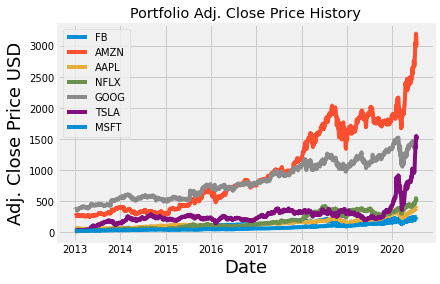

In [56]:
# Visually show the stock/portfolio 
title = 'Portfolio Adj. Close Price History'

# Get the stocks 
my_stocks = df

# Create and plot the df graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Close Price USD', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')

In [57]:
# Show the daily simple return of each stock in the portfolio
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT
Date,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581,-0.016686,-0.013396
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760,-0.010641,-0.018716
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363,-0.001744,-0.001870
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974,-0.019220,-0.005246
...,...,...,...,...,...,...,...
2020-07-10,0.002331,0.005458,0.001749,0.080688,0.020351,0.107848,-0.003033
2020-07-13,-0.024768,-0.030000,-0.004613,-0.042334,-0.019718,-0.030810,-0.030889
2020-07-14,0.003054,-0.006443,0.016548,-0.001180,0.006114,0.013186,0.006181


In [58]:
# Analyze the annualized covariance matrix of the stocks in the portfolio.
# Covariance matrix measures two variables in how they vary/move together. 
# So the matrix is the directional relationship between two assets prices. 
# Taking the sqrt of this matrix's variance/std deviation gives the stocks volatility. 
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT
FB,0.116620,0.052354,0.041115,0.054771,0.049116,0.056027,0.041965
AMZN,0.052354,0.092003,0.035817,0.061574,0.046646,0.052646,0.043182
AAPL,0.041115,0.035817,0.076383,0.032031,0.037528,0.044007,0.041707
NFLX,0.054771,0.061574,0.032031,0.212625,0.049090,0.071079,0.043730
GOOG,0.049116,0.046646,0.037528,0.049090,0.064954,0.045429,0.043710
TSLA,0.056027,0.052646,0.044007,0.071079,0.045429,0.295764,0.046188
MSFT,0.041965,0.043182,0.041707,0.043730,0.043710,0.046188,0.068693


In [59]:
# Calculate the portfolio variance 
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05931558217982029

In [60]:
# Calculate the portfolio volatility aka std deviation aka risk
port_volatility = np.sqrt(port_variance)
port_volatility

0.2435479053078065

In [61]:
# Calculate the annual portfolio return 
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.39584710700728276

In [62]:
# Show the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'
print("Before Optimization")
print("Expected annual return: "+ percent_ret)
print("Annual volatility / risk: "+ percent_vols)
print("Annual variance: "+ percent_var)
# There is a python package that can analyze the portfolio and give a higher return with a lower risk.

Before Optimization
Expected annual return: 40.0%
Annual volatility / risk: 24.0%
Annual variance: 6.0%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 2.1MB/s 


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [49]:
# Optimization of the portfolio
# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print("After Optimization")
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

After Optimization
OrderedDict([('FB', 0.04904), ('AMZN', 0.17874), ('AAPL', 0.06929), ('NFLX', 0.25513), ('GOOG', 0.0), ('TSLA', 0.19851), ('MSFT', 0.24929)])
Expected annual return: 46.2%
Annual volatility: 27.1%
Sharpe Ratio: 1.63


(0.46241271740914813, 0.27063055921738866, 1.6347478225981587)

In [ ]:
0.04904 + 0.17874 + 0.06929 + 0.25513 + 0.0 + 0.19851 + 0.24929

1.0

In [ ]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation , leftover = da.lp_portfolio()
print("Discrete allocation:",allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'FB': 3.0, 'AMZN': 1.0, 'AAPL': 2.0, 'NFLX': 7.0, 'TSLA': 2.0, 'MSFT': 18.0}
Funds remaining: $67.46
